In [10]:
!pip install pandas nltk


In [11]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


In [12]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1')
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [13]:
# Try skipping the first few rows
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', skiprows=5, names=columns)

# Display the first few rows
df.columns




Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [14]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
# Read the first few lines of the file without any specific columns
with open("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1') as f:
    for i in range(10):  # Print the first 10 lines
        print(f.readline())


"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds"

"0","1467811184","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","ElleCTF","my whole body feels itchy and like its on fire "

"0","1467811193","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","Karoli","@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "

"0","1467811372","Mon Apr 06 22:20:00 PDT 2009","NO_QUERY","joy_wolf","@Kwesidei not the whole crew "

"0","1467811592","Mon Apr 06 22:20:03 PDT 200

In [18]:
import pandas as pd

columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv("training.1600000.processed.noemoticon.csv",
                 encoding='ISO-8859-1',
                 skiprows=5,
                 names=columns,
                 sep=',',
                 header=None)

df_reset = df.reset_index(drop=True)
df_reset.head()


,target,ids,date,flag,user,text
0,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
1,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
2,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
3,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
4,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [20]:
# Remove rows with missing or null values
df.dropna(subset=['text'], inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)


print(df.isnull().sum())


null Val :  target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


In [26]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return " ".join(tokens)

df['text'] = df['text'].apply(preprocess_text)

print(df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   target         ids                          date      flag  \
0       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
1       0  1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY   
2       0  1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY   
3       0  1467811795  Mon Apr 06 22:20:05 PDT 2009  NO_QUERY   
4       0  1467812025  Mon Apr 06 22:20:09 PDT 2009  NO_QUERY   

              user                                               text  
0         joy_wolf                                kwesidei whole crew  
1          mybirch                                           need hug  
2             coZZ  loltrish hey long time see ye rain bit bit lol...  
3  2Hood4Hollywood                                tatianak nope didnt  
4          mimismo                                 twittera que muera  


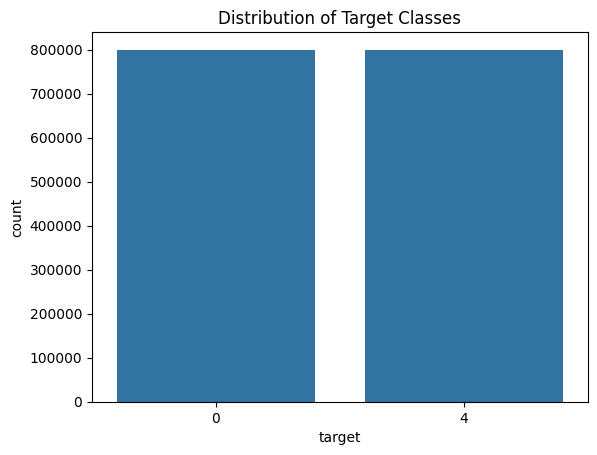

0                                  kwesidei whole crew
1                                             need hug
2    loltrish hey long time see ye rain bit bit lol...
3                                  tatianak nope didnt
4                                   twittera que muera
Name: text, dtype: object


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data=df, x='target')
plt.title('Distribution of Target Classes')
plt.show()

print(df['text'].head())


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])

print(X.shape)


(1599995, 5000)


In [29]:
from sklearn.model_selection import train_test_split

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')


Training data shape: (1279996, 5000)
Test data shape: (319999, 5000)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)

# Train
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.7732305413454417
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159338
           4       0.76      0.79      0.78    160661

    accuracy                           0.77    319999
   macro avg       0.77      0.77      0.77    319999
weighted avg       0.77      0.77      0.77    319999



In [35]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)


misclassified_indices = np.where(y_test != y_pred)[0]


if hasattr(X_test, "toarray"):
    misclassified_data = X_test[misclassified_indices].toarray()
else:
    misclassified_data = X_test[misclassified_indices]


misclassified = pd.DataFrame(data=misclassified_data, columns=vectorizer.get_feature_names_out())


misclassified['true_label'] = y_test[misclassified_indices]
misclassified['predicted_label'] = y_pred[misclassified_indices]


print(misclassified.head())

    aa  aaah  aah  aaron   ab  abandon  abbi  abc  abil  abit  ...      zach  \
0  0.0   0.0  0.0    0.0  0.0      0.0   0.0  0.0   0.0   0.0  ...  0.000000   
1  0.0   0.0  0.0    0.0  0.0      0.0   0.0  0.0   0.0   0.0  ...  0.000000   
2  0.0   0.0  0.0    0.0  0.0      0.0   0.0  0.0   0.0   0.0  ...  0.000000   
3  0.0   0.0  0.0    0.0  0.0      0.0   0.0  0.0   0.0   0.0  ...  0.441241   
4  0.0   0.0  0.0    0.0  0.0      0.0   0.0  0.0   0.0   0.0  ...  0.000000   

   zealand  zero  zoe  zombi  zone  zoo  zzz  true_label  predicted_label  
0      0.0   0.0  0.0    0.0   0.0  0.0  0.0           0                4  
1      0.0   0.0  0.0    0.0   0.0  0.0  0.0           0                4  
2      0.0   0.0  0.0    0.0   0.0  0.0  0.0           0                4  
3      0.0   0.0  0.0    0.0   0.0  0.0  0.0           4                0  
4      0.0   0.0  0.0    0.0   0.0  0.0  0.0           0                4  

[5 rows x 5002 columns]


In [36]:
print(misclassified[['true_label', 'predicted_label']].head(10))


   true_label  predicted_label
0           0                4
1           0                4
2           0                4
3           4                0
4           0                4
5           4                0
6           4                0
7           0                4
8           0                4
9           0                4


In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7732


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[119873  39465]
 [ 33101 127560]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77    159338
           4       0.76      0.79      0.78    160661

    accuracy                           0.77    319999
   macro avg       0.77      0.77      0.77    319999
weighted avg       0.77      0.77      0.77    319999



In [39]:
import joblib
joblib.dump(model, 'sentiment_model.pkl')


['sentiment_model.pkl']